#### A- Import all of the libraries and tools that you need including the following layers for your network

In [21]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Convolution2D, MaxPooling2D, Conv2DTranspose
from keras.models import Sequential

#### B- Import the mnist dataset and split it into testing and training:

In [22]:
(X_train, _), (X_test, _) = mnist.load_data()

#### C- Use the following function to add Random noise to all your training and testing samples, and save them as new datasets noisy_X_train and noisy_X_test

In [23]:
def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=array.shape)
    return np.clip(noisy_array, 0.0, 1.0)

noisy_X_train = noise(X_train)
noisy_X_test = noise(X_test)

#### D- Plot some of your samples with noise and without noise and compare them. 

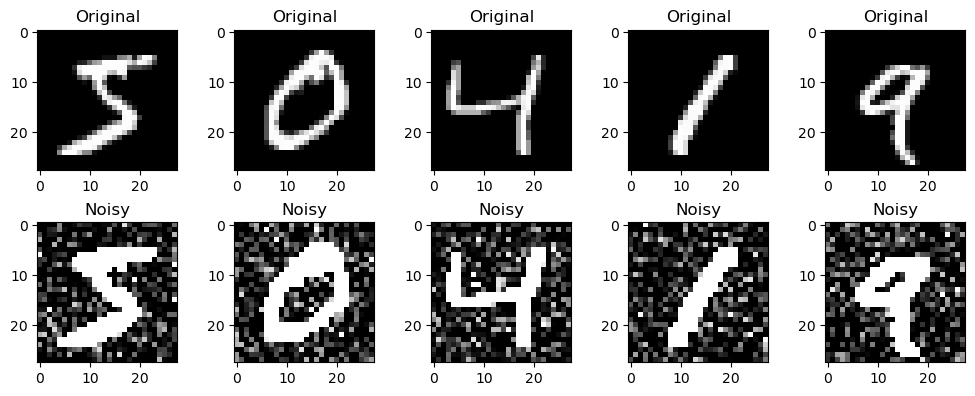

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Original')
    
    plt.subplot(2, 5, i + 6)
    plt.imshow(noisy_X_train[i], cmap='gray')
    plt.title('Noisy')
    
plt.tight_layout()
plt.show()

#### E- Now, we want to create our deep convolutional autoencoder for de-noising the images. As you saw in class lectures, the autoencoder includes an Encoder part that compresses the input, and a Decoder part that reconstruct the data.

In [25]:
# Creating the deep convolutional autoencoder
model = Sequential([
    # Encoder
    Convolution2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    
    MaxPooling2D((2, 2), padding="same"),
    Convolution2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),
    
    # Decoder
    Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"),
    Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"),
    Convolution2D(1, (3, 3), activation="sigmoid", padding="same")
])

#### F- Compile the model with loss='binary_crossentropy', optimizer='adam'

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam')

#### G- Train the model ONLY using the training data.

In [27]:
model.fit(noisy_X_train, X_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 13s 26ms/step - loss: -472.8691
Epoch 2/5
469/469 [==============================] - 14s 29ms/step - loss: -500.6736
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: -503.5617
Epoch 4/5
469/469 [==============================] - 12s 26ms/step - loss: -503.9030
Epoch 5/5
469/469 [==============================] - 13s 27ms/step - loss: -504.0826


#### H- Now, Make prediction on your noisy testing set to de-noise it. The output of your prediction will be the de-noised version of your noisy testing set

In [28]:
no_noise_X_test = model.predict(noisy_X_test)

313/313 [==============================] - 1s 4ms/step


#### I- It is time to see the Magic! Plot 10 random images of your testing set before and after denoising to see how amazing your model is in cleaning noisy images. 

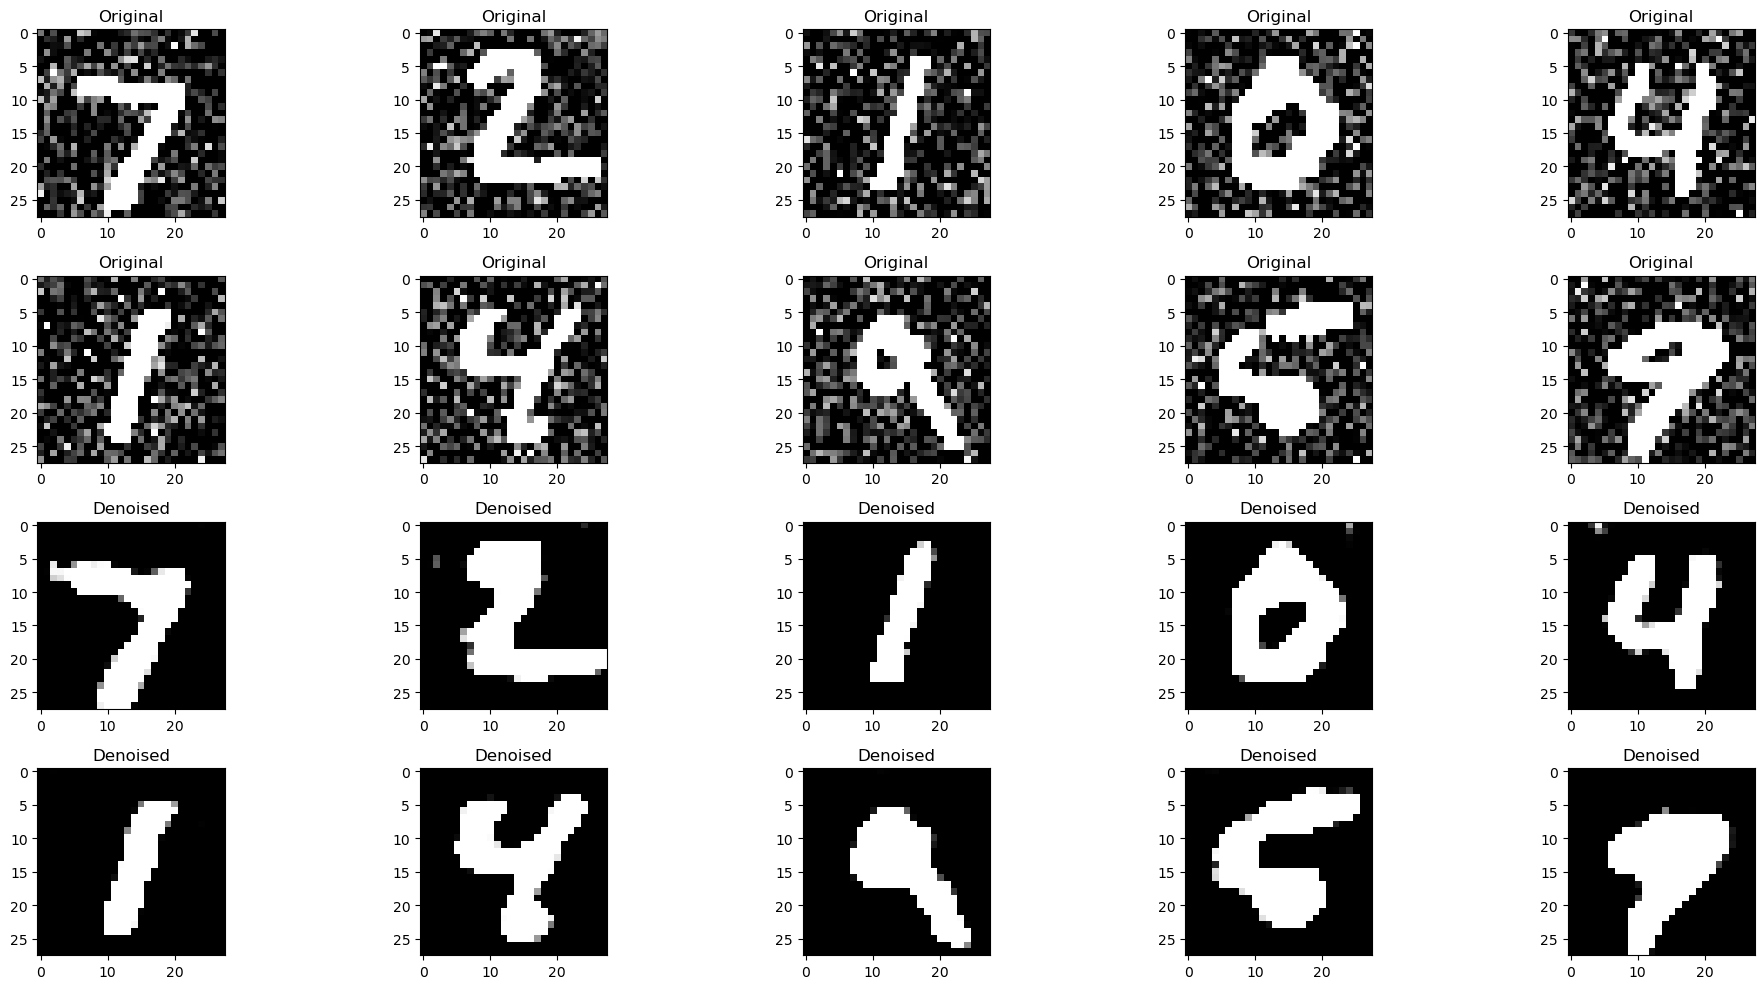

In [33]:
plt.figure(figsize=(20, 10))

for i in range(10):
    plt.subplot(4, 5, i + 1)
    plt.imshow(noisy_X_test[i], cmap='gray')
    plt.title('Original')

    plt.subplot(4, 5, i + 11)
    plt.imshow(no_noise_X_test[i], cmap='gray')
    plt.title('Denoised')

plt.tight_layout()
plt.show()